# Temperature Forecast Project using ML

PROBLEM STATEMENT:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 

maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.
we have to predict the temperature, 
Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9



OUTPUT VARIABLES:

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [1]:
#import necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df=pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [42]:
#To know the shape of the dataset
df.shape

(7588, 28)

In [3]:
 # first 5 records
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
#Last 5 records
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
#print the names of all columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

All variables are Numerical in nature.

Next_Tmax and Next_Tmin are Target Variable.

This dataset contain 7752 Rows and 25 Columns.

In [6]:
#Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


All variables are numerical in nature except Date.

In [7]:
#check null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values present in the dataset.

In [8]:
 #check if any duplicate entry exists
df.duplicated().sum()

0

# spliting date into date, month and year.


In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

In [11]:
#statistical summary of the data
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7677.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.262458  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.146654  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.315697  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.575489  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7752.000000  7725.000000  7725.000000  7750.000000  7750.000000   
mean       5341.502803    30.274887    22.932220    16.370968     7.080645   
std         429.158867     3.128010     2.487613     8.241331     2.238364   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        4999.018555    28.200000    21.300000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7750.000000  
mean   2015.000000  
std       1.414305  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [41]:
#drop all missing values from the dataset
df.dropna(inplace=True)

In [13]:
df

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7745     21.0 2017-08-30          23.1          17.8    24.688997   
7746     22.0 2017-08-30          22.5          17.4    30.094858   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin   Day  Month    Year  
0          21.2  30.0    6.0  2013.0  
1          22.5  30.0    6.0  2013.0  
2          23.9  30.0    6.0  2013.0  
3          24.3  30.0    6.0  2013.0  
4          22.5  30.0    6.0  2013.0  
...         ...   ...    ...     ...  
7745       17.7  30.0    8.0  2017.0  
7746       17.1  30.0    8.0  2017.0  
7747       18.1  30.0    8.0  2017.0  
7748       18.8  30.0    8.0  2017.0  
7749       17.4  30.0    8.0  2017.0  

[7588 rows x 28 columns]

 Present Temperature using histogram 

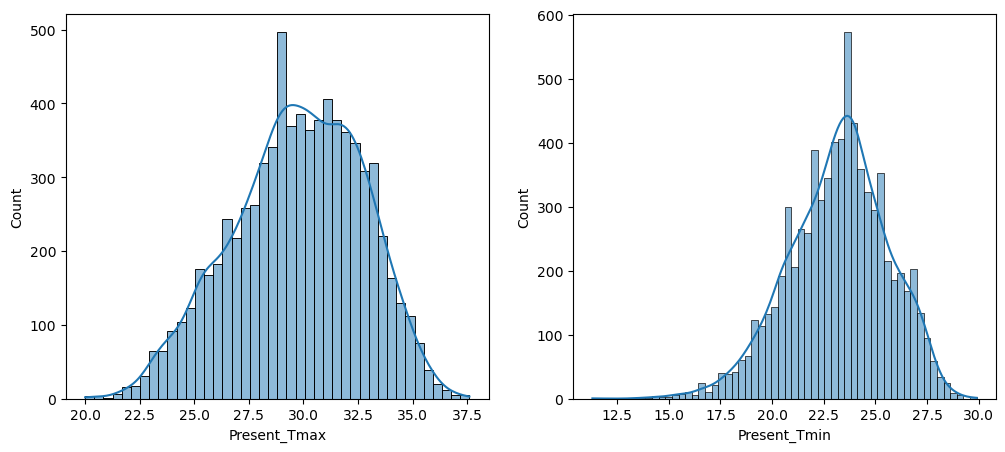

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True)
plt.show()

 From the above plot,we can see that
    Present Temperature Maximum varies between(27.5 to 32.5 degree)
Present Temperature Minimum varies between (22.5 to 25.5 degree)

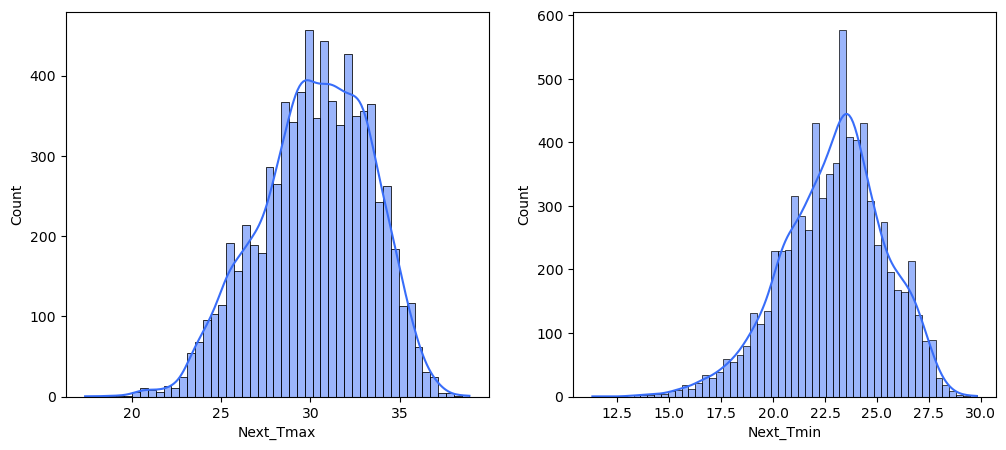

In [39]:
# Plotting histogram for target variable Next Temperature
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True)
plt.show()

From the above plot,we can see that
Next Temperature Maximum varies between(27.5 to 32.5 degree)
Next Temperature Minimum varies between (22.5 to 25.5 degree)

In [44]:
print(df.Present_Tmax.max())
print(df.Present_Tmax.min())

37.6
20.0


In [45]:
print(df.Next_Tmax.max())
print(df.Next_Tmax.min())

38.9
17.4


In [21]:
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      ...      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
5717  ...  37.4832  127.024  56.4448  1.2313      5082.563477       37.0   

      Next_Tmin  Day  Month    Year  
5717       27.8  8.0   11.0  2016.0  

[1 rows x 28 columns]

station 18 have maximium present temperature 37.6

In [22]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      ...      lat      lon      DEM  Slope  Solar radiation  Next_Tmax  \
7725  ...  37.6046  126.991  212.335  2.785       4614.76123       23.8   

      Next_Tmin   Day  Month    Year  
7725       15.1  30.0    8.0  2017.0  

[1 rows x 28 columns]

station 1 have minimum present temperature 20.0

In [23]:
df.loc[df.Next_Tmax==df.Next_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6175      1.0 2016-08-30          21.8          15.2    95.803284   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS   LDAPS_LH  \
6175    98.809067         17.624954         14.720029  17.770188  55.442309   

      ...      lat      lon      DEM  Slope  Solar radiation  Next_Tmax  \
6175  ...  37.6046  126.991  212.335  2.785      4575.028809       17.4   

      Next_Tmin   Day  Month    Year  
6175       14.4  30.0    8.0  2016.0  

[1 rows x 28 columns]

station 1 have minimum Next temperature 21.8

In [24]:
df.loc[df.Next_Tmax==df.Next_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5692     18.0 2016-10-08          35.0          27.2    45.385143   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  \
5692    81.327271         35.387552         26.787774  5.713128  103.43312   

      ...      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
5692  ...  37.4832  127.024  56.4448  1.2313      5113.475586       38.9   

      Next_Tmin  Day  Month    Year  
5692       26.4  8.0   10.0  2016.0  

[1 rows x 28 columns]

station 18 have maximium Next temperature 35.0

# Lets analyse via point plot

<AxesSubplot:xlabel='station', ylabel='Present_Tmax'>

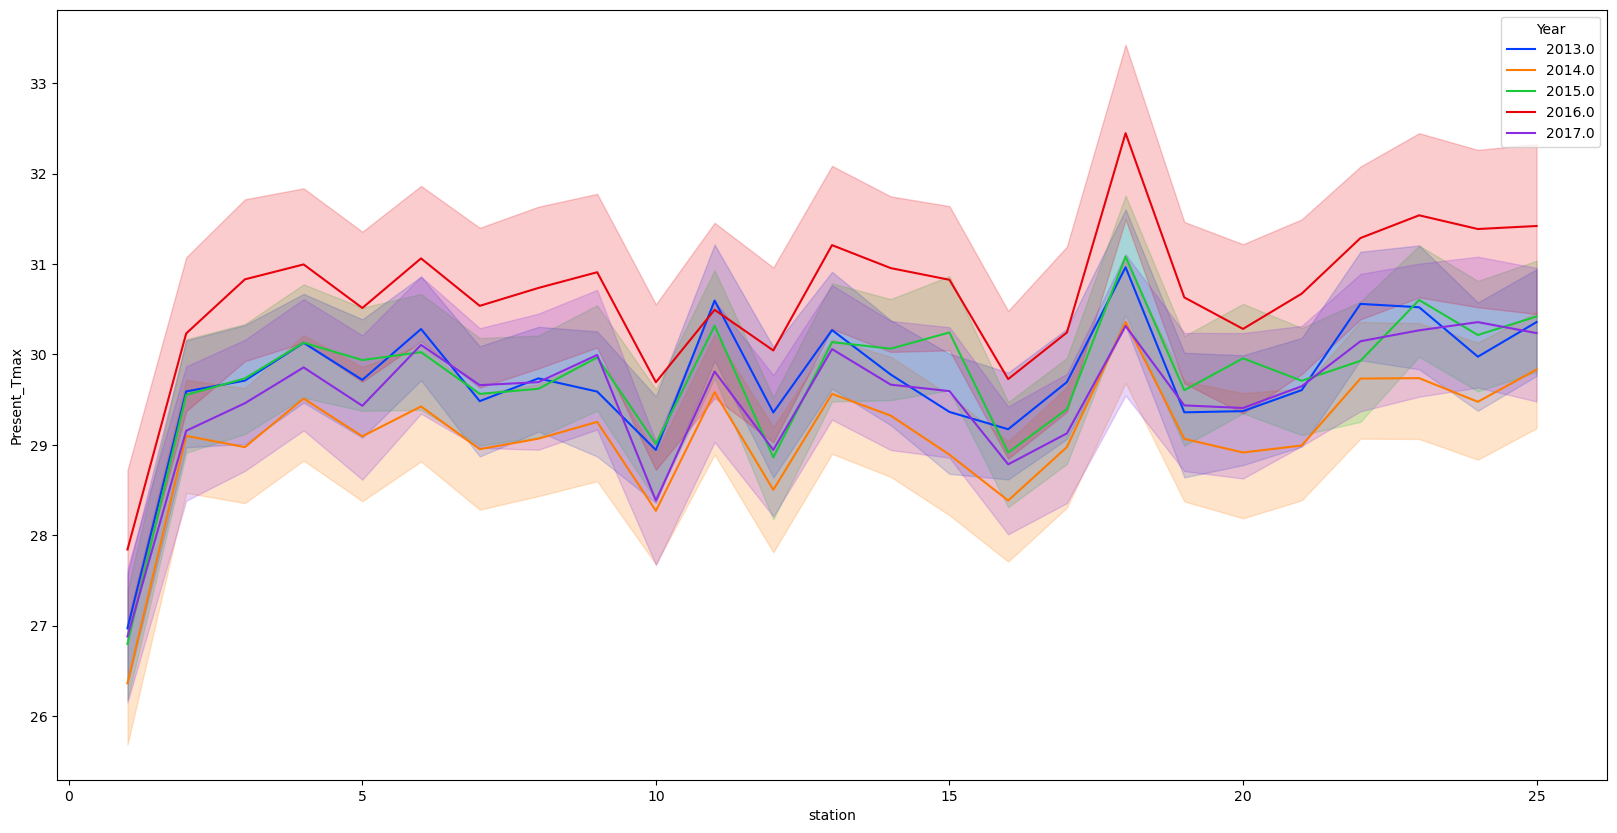

In [52]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['station'], y=df['Present_Tmax'],hue=df['Year'],palette="bright")

Higher temperature recorded at station 18 in compare to other stations.

Station 1 is coolest station over all others
.
We can see 2016 is hottest year and 2014 is coolest year

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

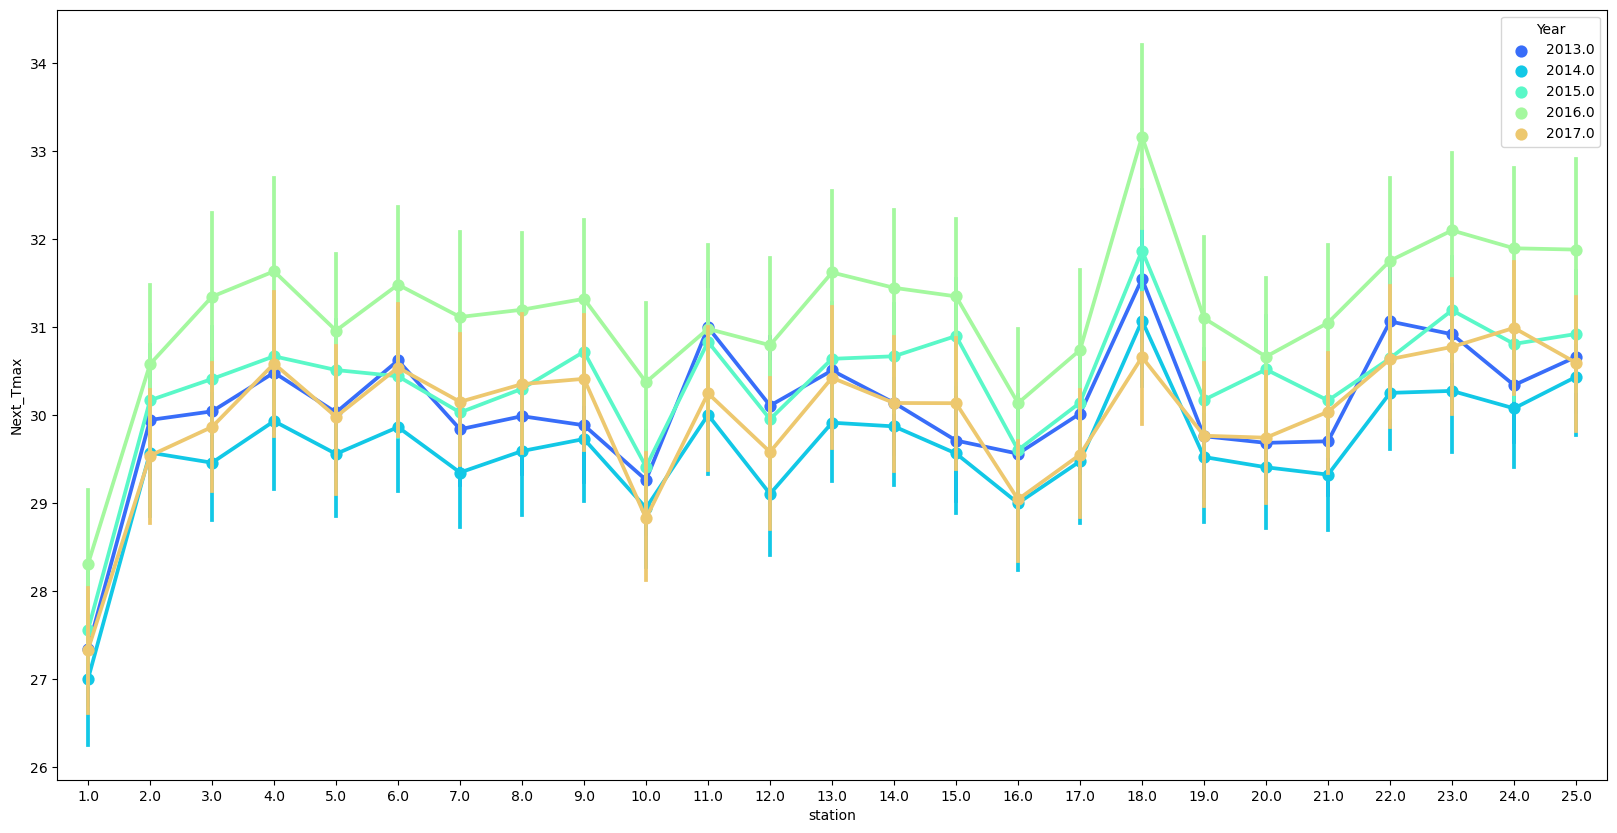

In [53]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df['station'], y=df['Next_Tmax'],hue=df['Year'])

Year 2014 is coolest year of all time frame.
Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature.
Station 1 is coolest station of all time 

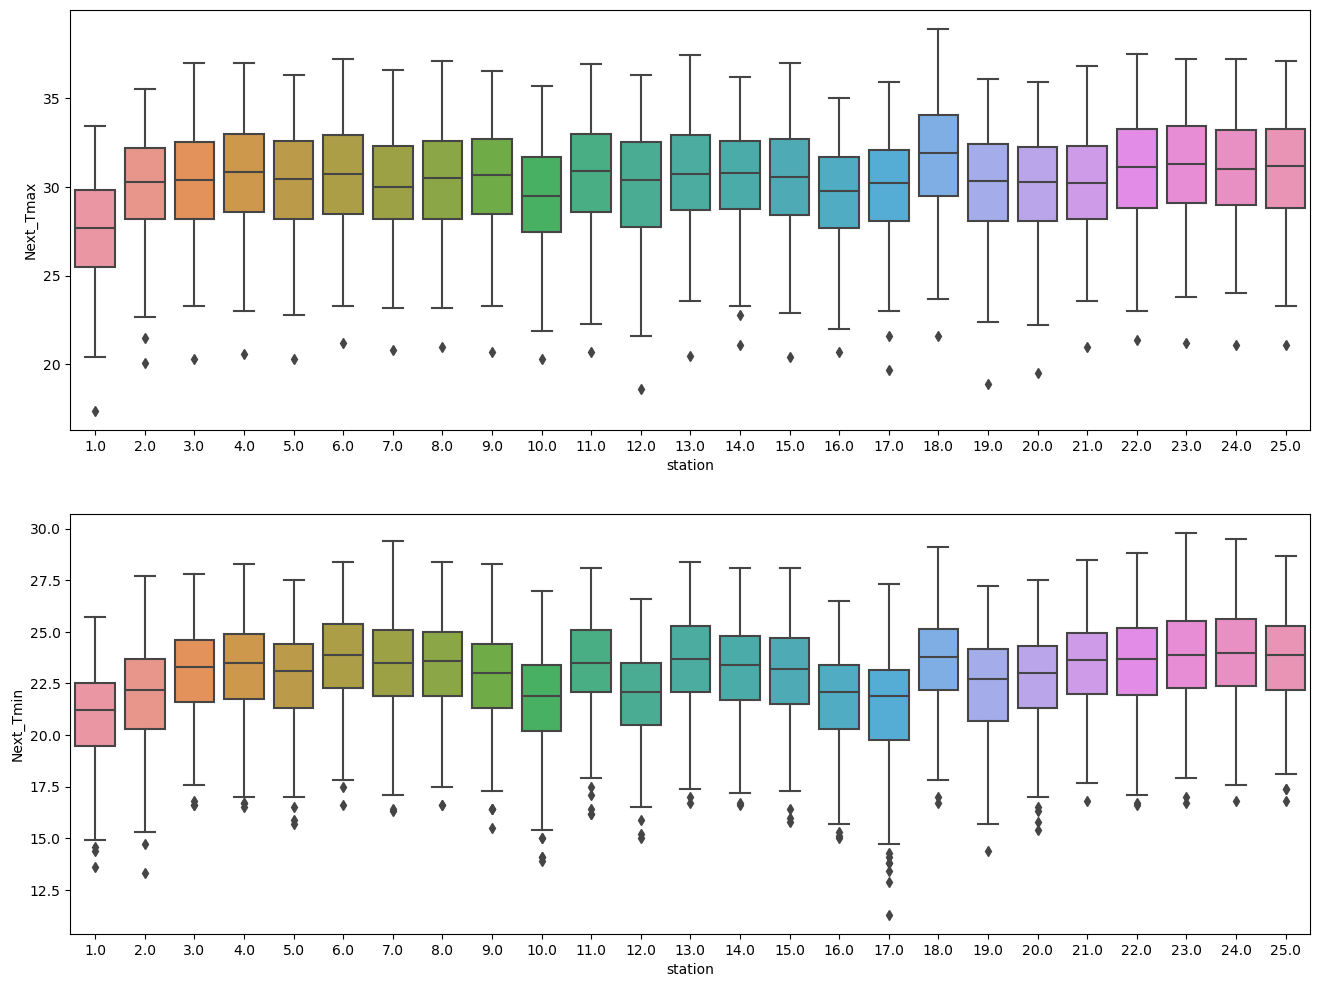

In [57]:
# Visualizing the realtion between station and target variables Next_Tmax and Next_Tmin
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'],data=df)
plt.subplot(2,1,2)
sns.boxplot(df['station'],df['Next_Tmin'],data=df)
plt.show()

From the boxplot,we can clearly seen that,station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets

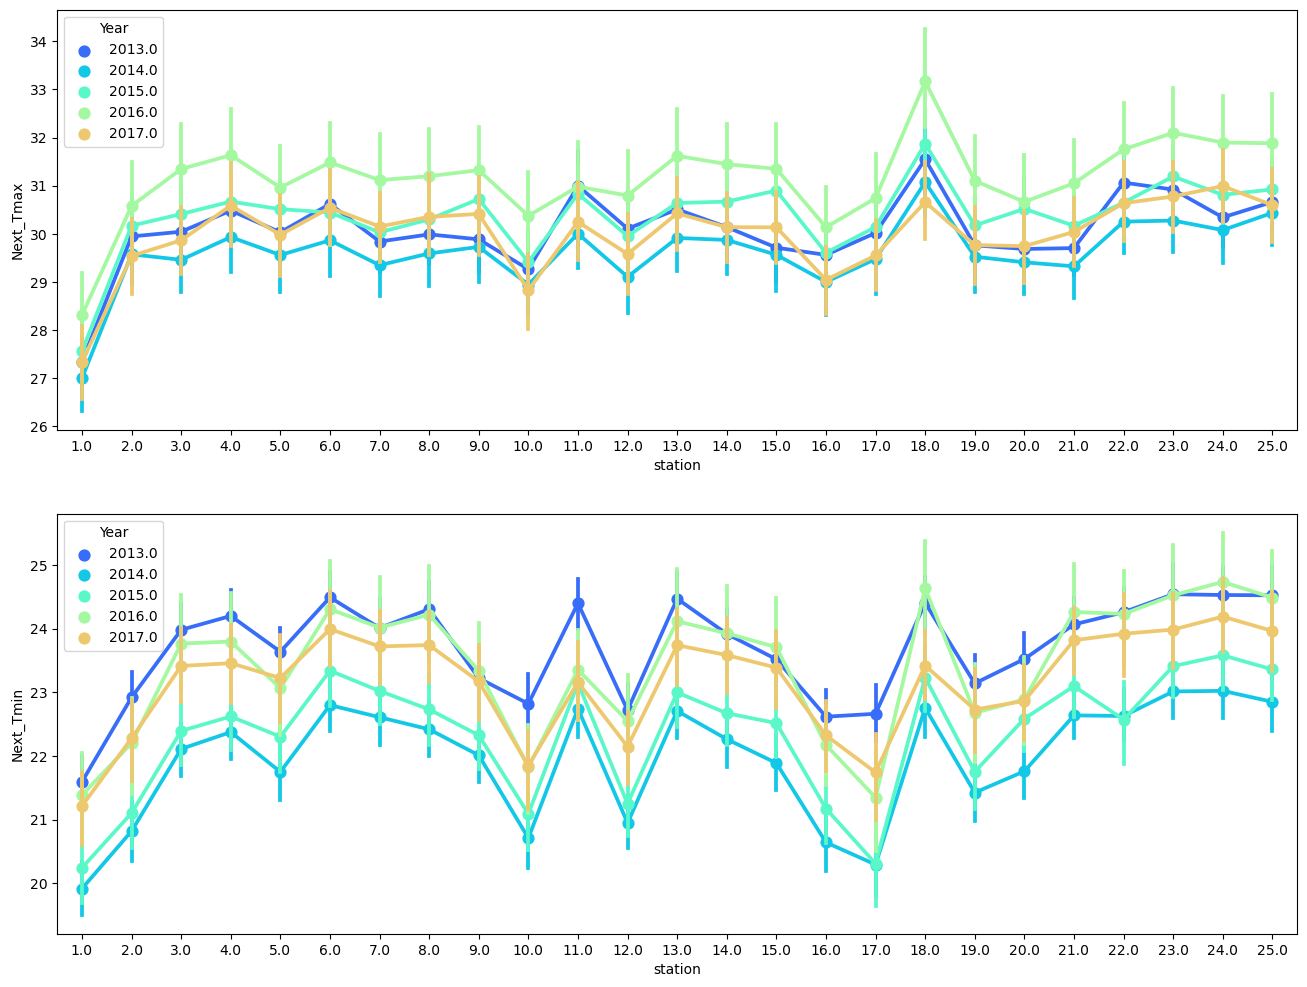

In [59]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.pointplot(df['station'],df['Next_Tmax'],data=df,hue=df['Year'])
plt.subplot(2,1,2)
sns.pointplot(df['station'],df['Next_Tmin'],data=df,hue=df['Year'])
plt.show()

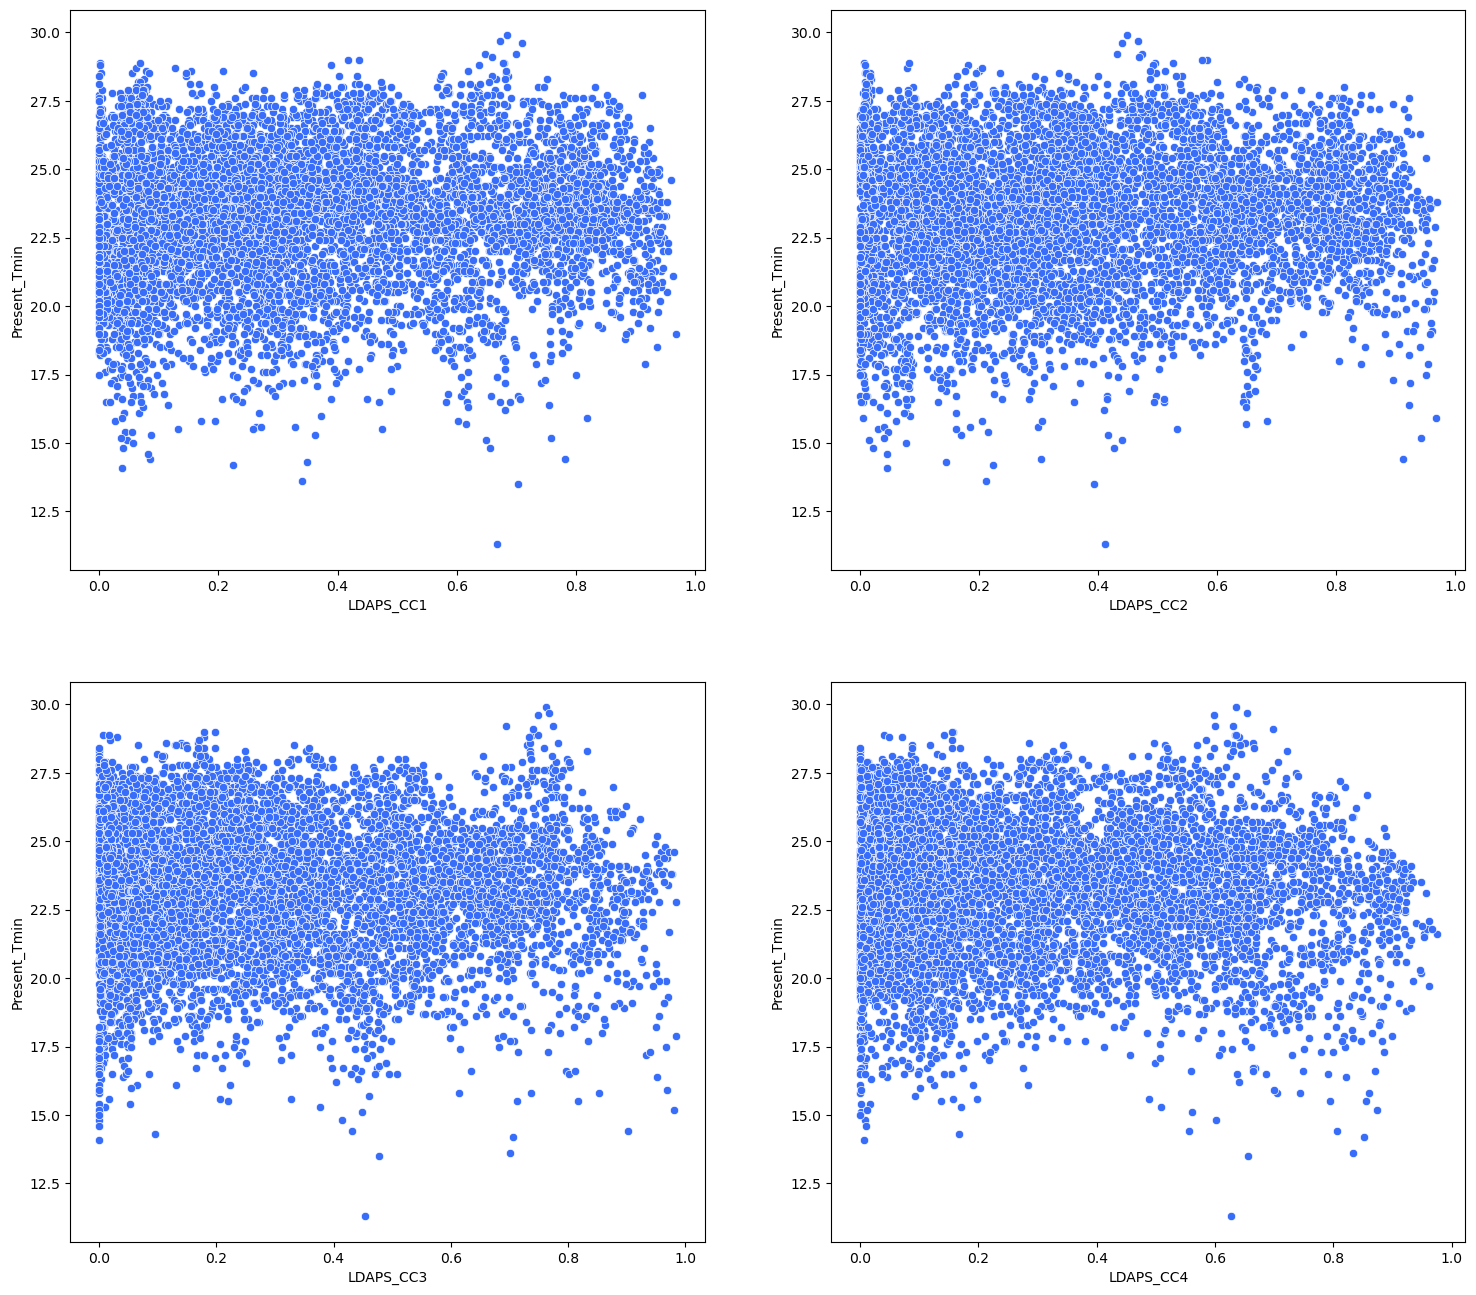

In [36]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_CC1',y='Present_Tmin',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_CC2',y='Present_Tmin',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_CC3',y='Present_Tmin',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_CC4',y='Present_Tmin',data=df)
plt.show()


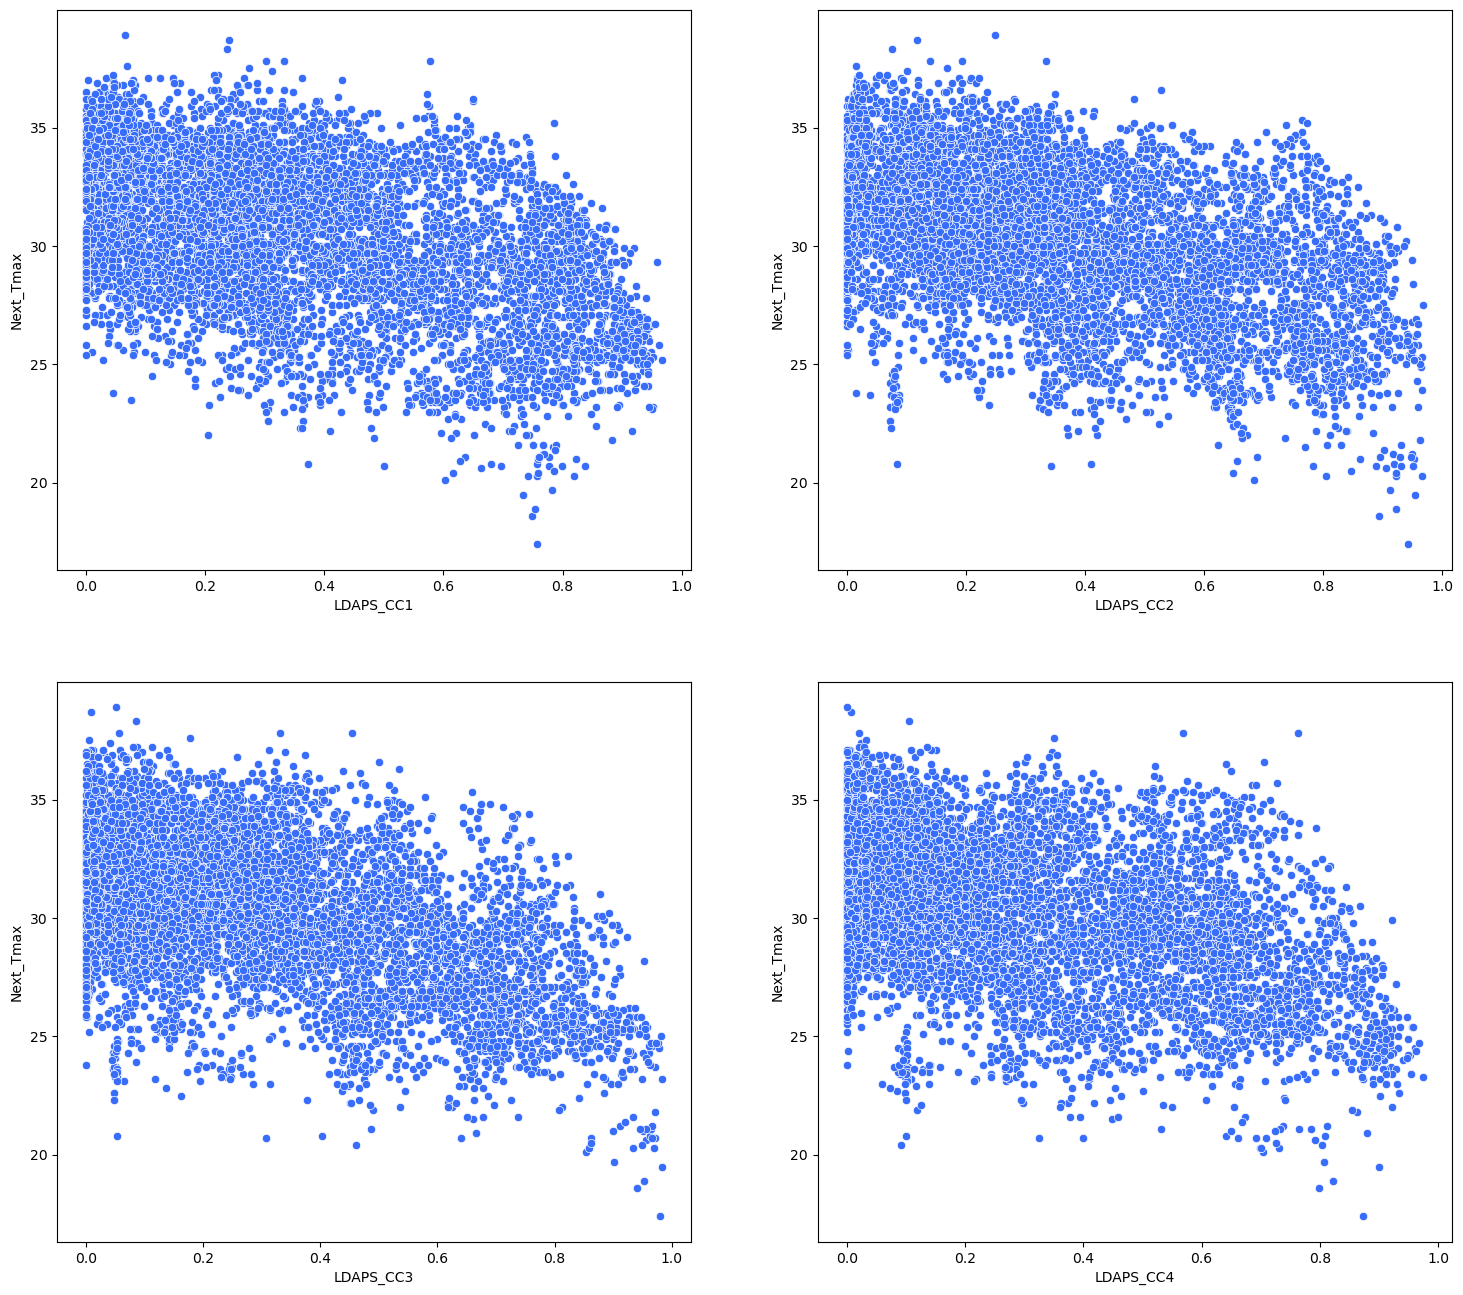

In [37]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df)
plt.show()


Next-day Temperature Maximum decreases as cloud cover increases 

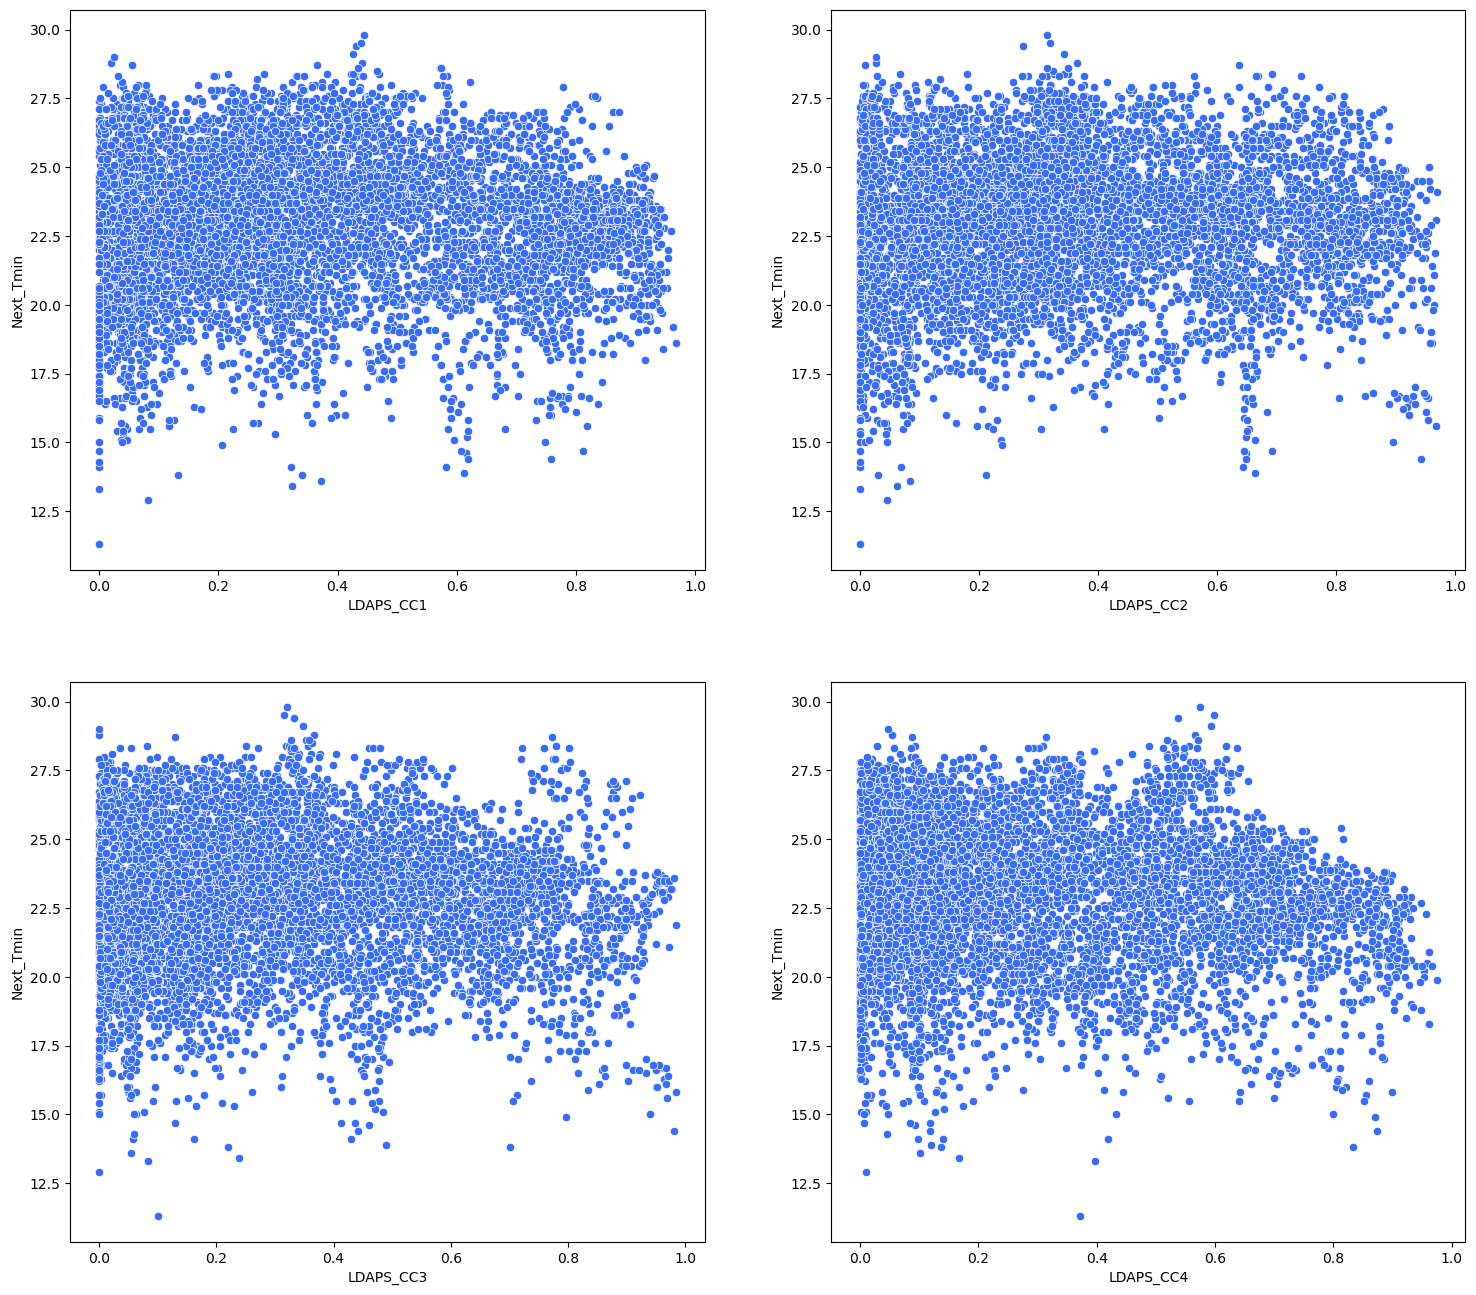

In [61]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df)
plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df)
plt.show()

No significant relation between Next_Tmin and cloud cover in scatterplot.

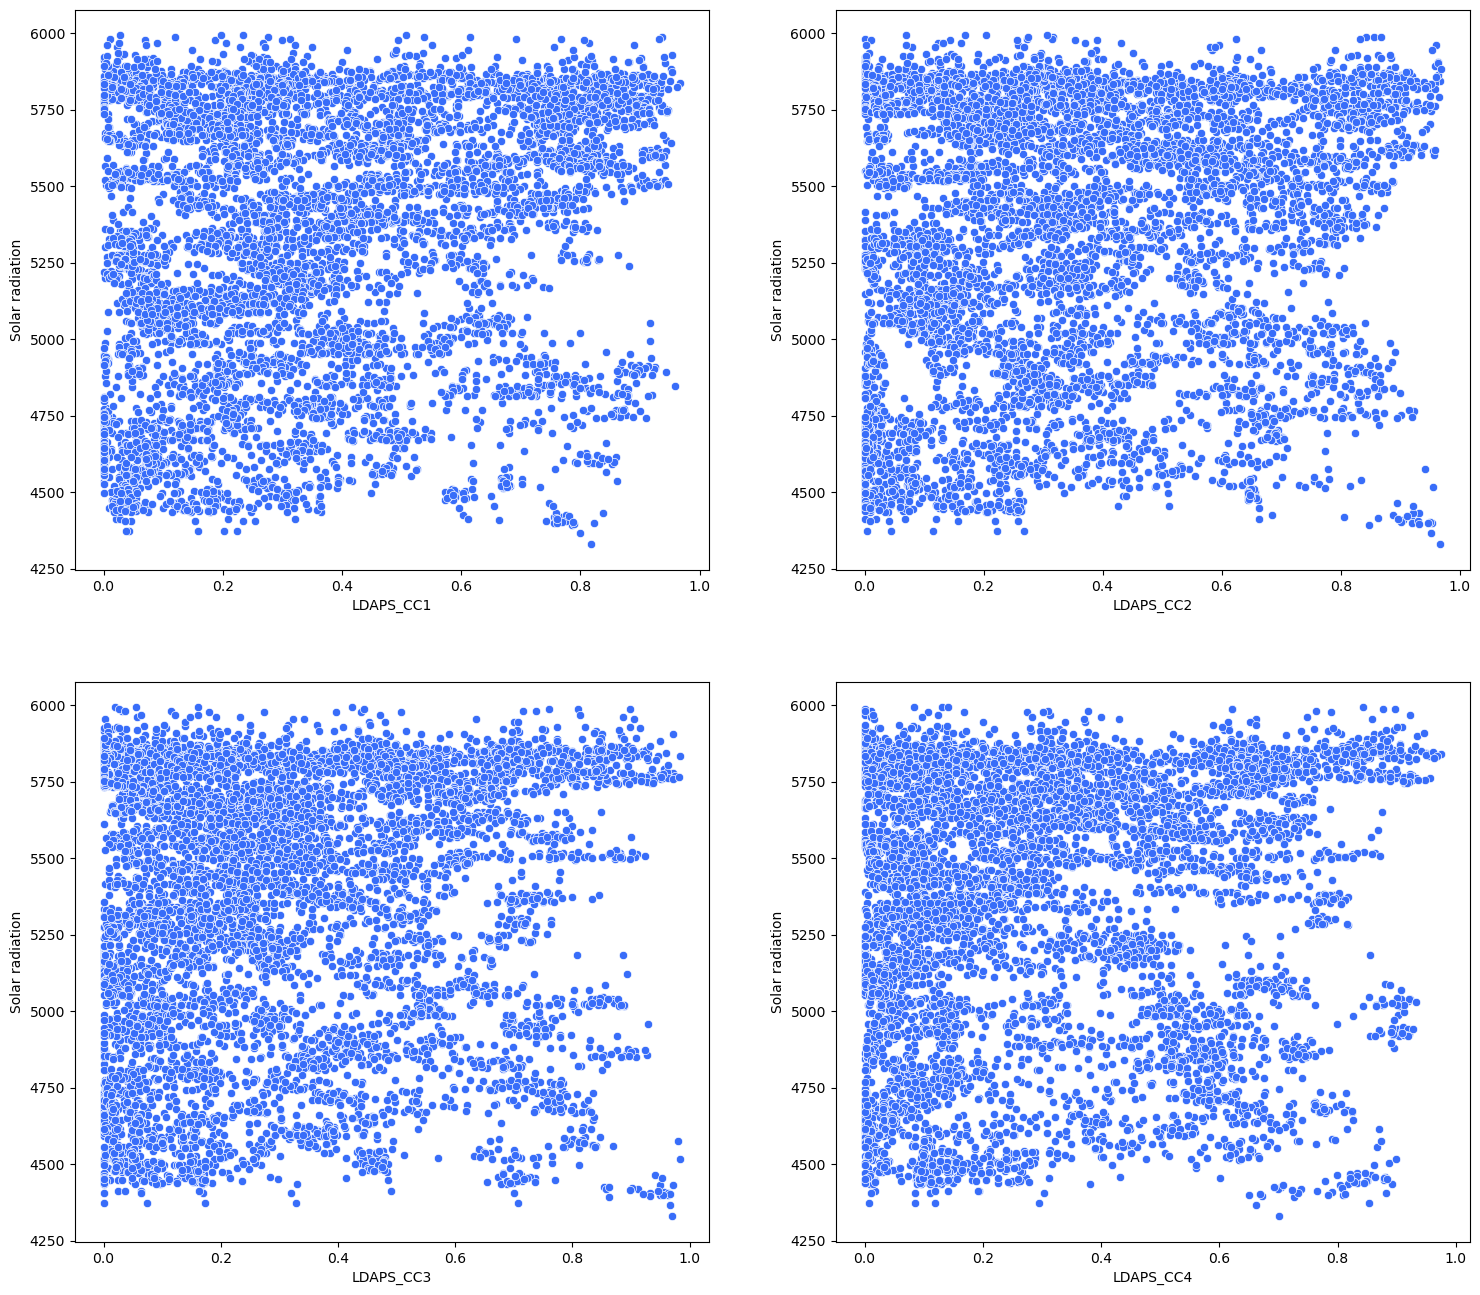

In [64]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df)
plt.show()

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

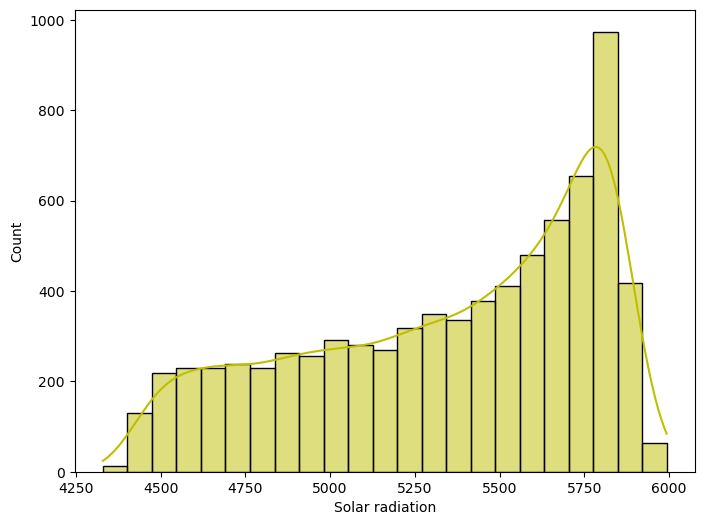

In [66]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')

In [71]:
df['Solar radiation'].max()

5992.895996

In [72]:
df['Solar radiation'].min()

4329.520508

<AxesSubplot:xlabel='Month', ylabel='Solar radiation'>

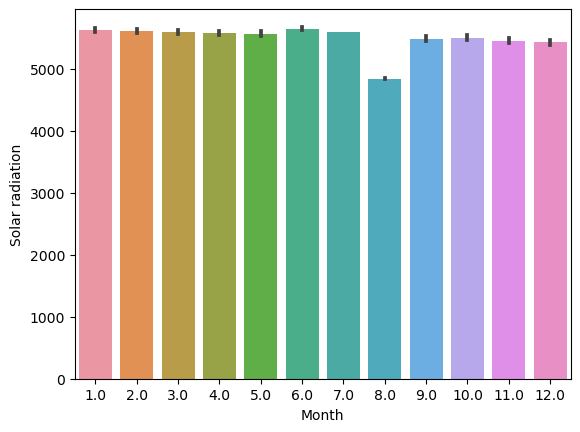

In [73]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

it has its minimum value at 4329.52  and maximum values at 5992.89

Minimum solar radiation occur in month of 8.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

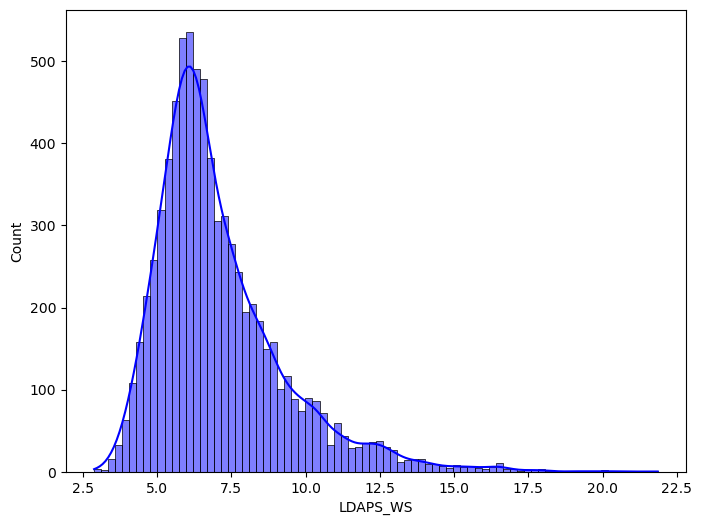

In [75]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='b')

In [78]:
df['LDAPS_WS'].min()

2.882579625

In [77]:
df['LDAPS_WS'].max()

21.85762099

From the above plot, minimum value  for win speed at 2.88m/s and maximum values at 21.85m/s.
Also most of reading values lies in the rabge 5m/s to 8m/s.


<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

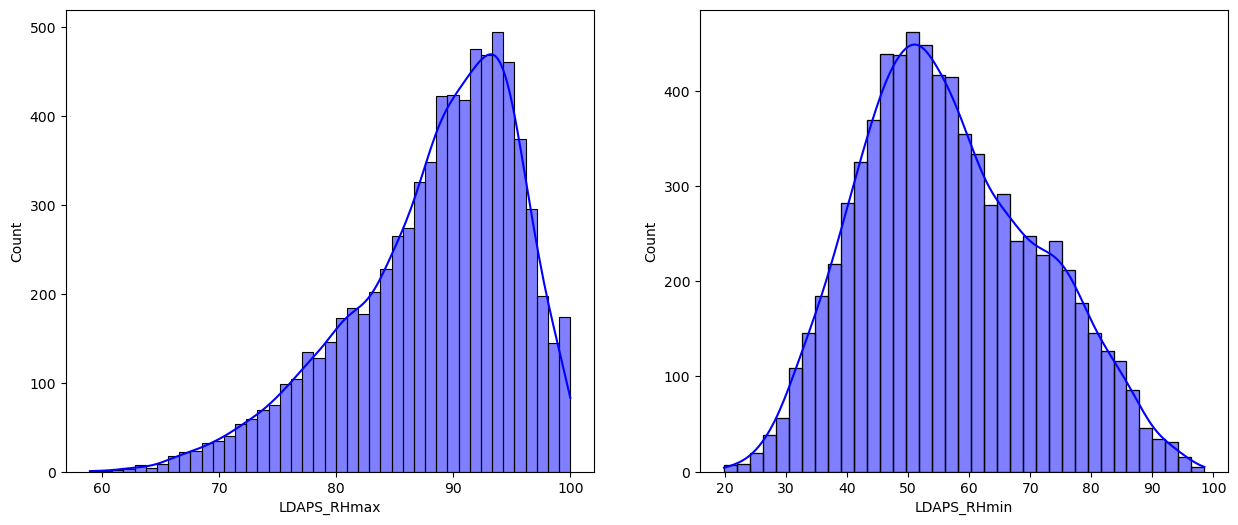

In [80]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')

Maximum Relative humidity for most of the days lie in the range 90 to 97
Minimum Relative humidity lies in the range 45 to 62.

In [85]:
print(df['LDAPS_RHmax'].max())
print(df['LDAPS_RHmin'].min())

100.0001526
19.79466629


<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

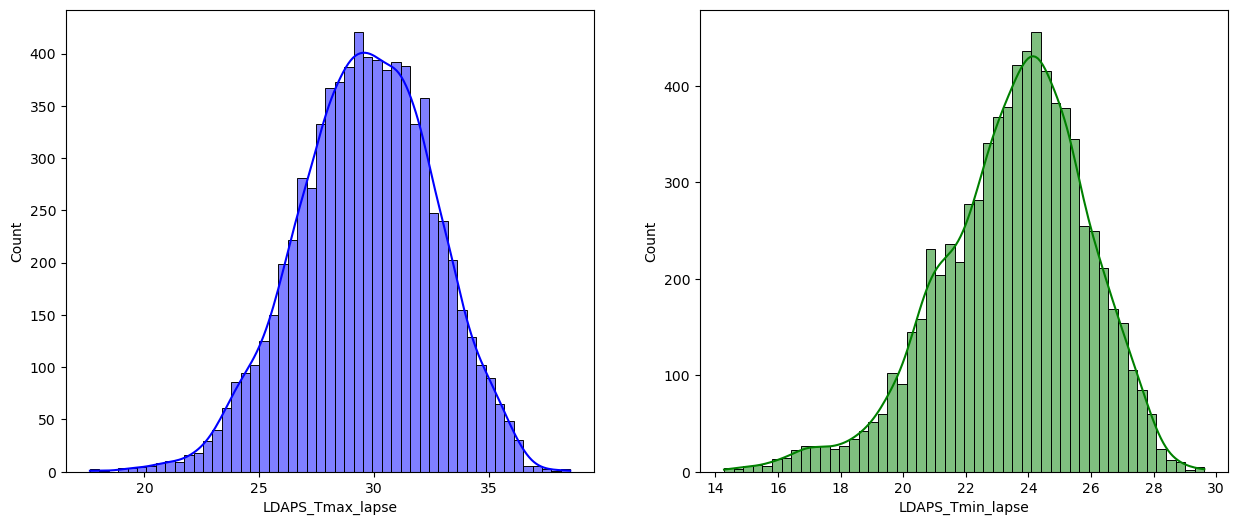

In [83]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')

Tmax and Tmin for  lapse rate are almost normally distributed.

Tmax_lapse for majority of days its values lies in the range 27 to 33 
Tmin_lapse for majority of days its values lies in the range 23 to 26 

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

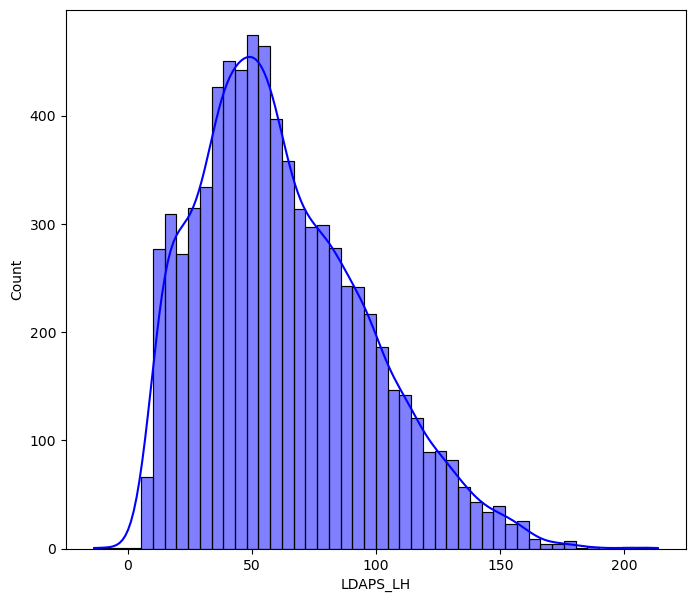

In [84]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')

In [86]:
print(df['LDAPS_LH'].max())
print(df['LDAPS_LH'].min())

213.4140062
-13.60321209


<AxesSubplot:xlabel='Year', ylabel='LDAPS_LH'>

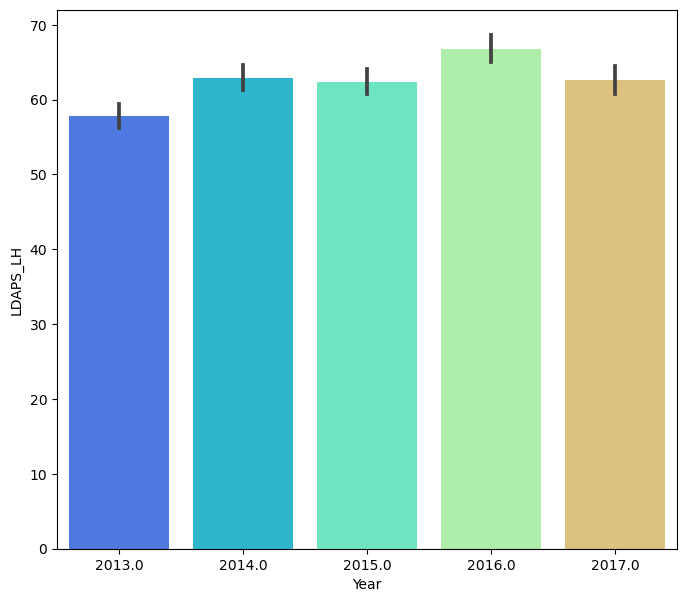

In [88]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Year'])

Minimum Latent Heat Flux in the year 2013.

Maximum Latent Heat Flux in the year 2016

In [89]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'], datetime64[ns]: ['Date']}

In [90]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

In [91]:
df.shape

(7588, 27)

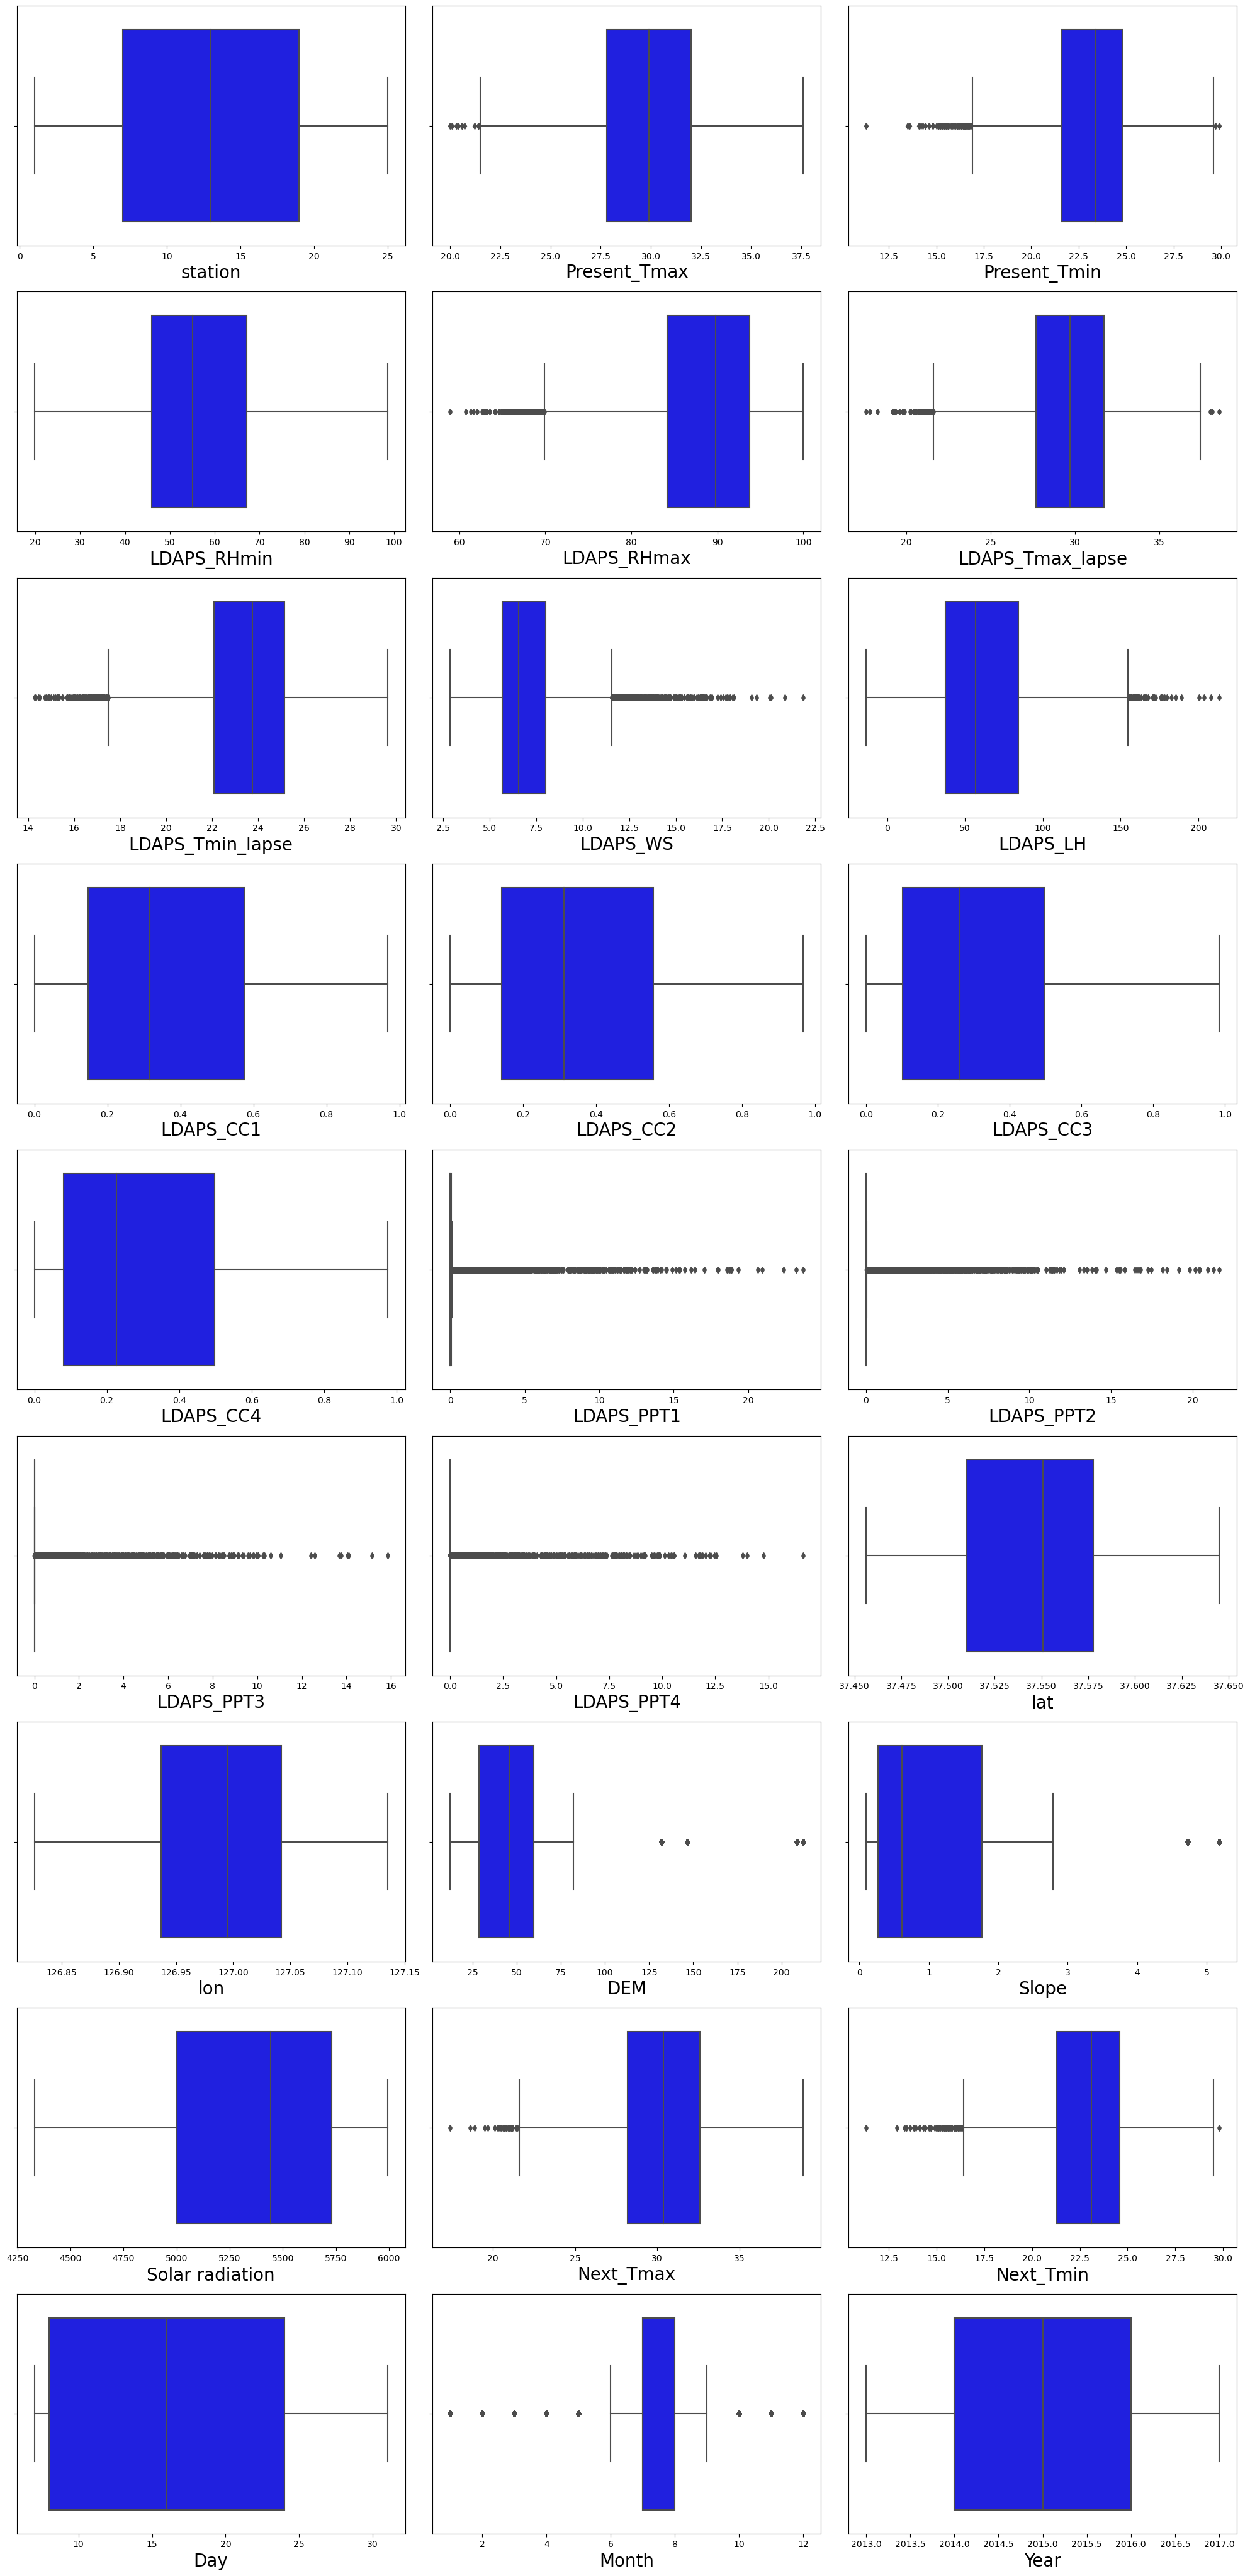

In [93]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From Boxplot we can see outliers exist dataset.

In [94]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [97]:
df.shape

(7588, 27)

In [99]:
df1.shape

(6739, 27)

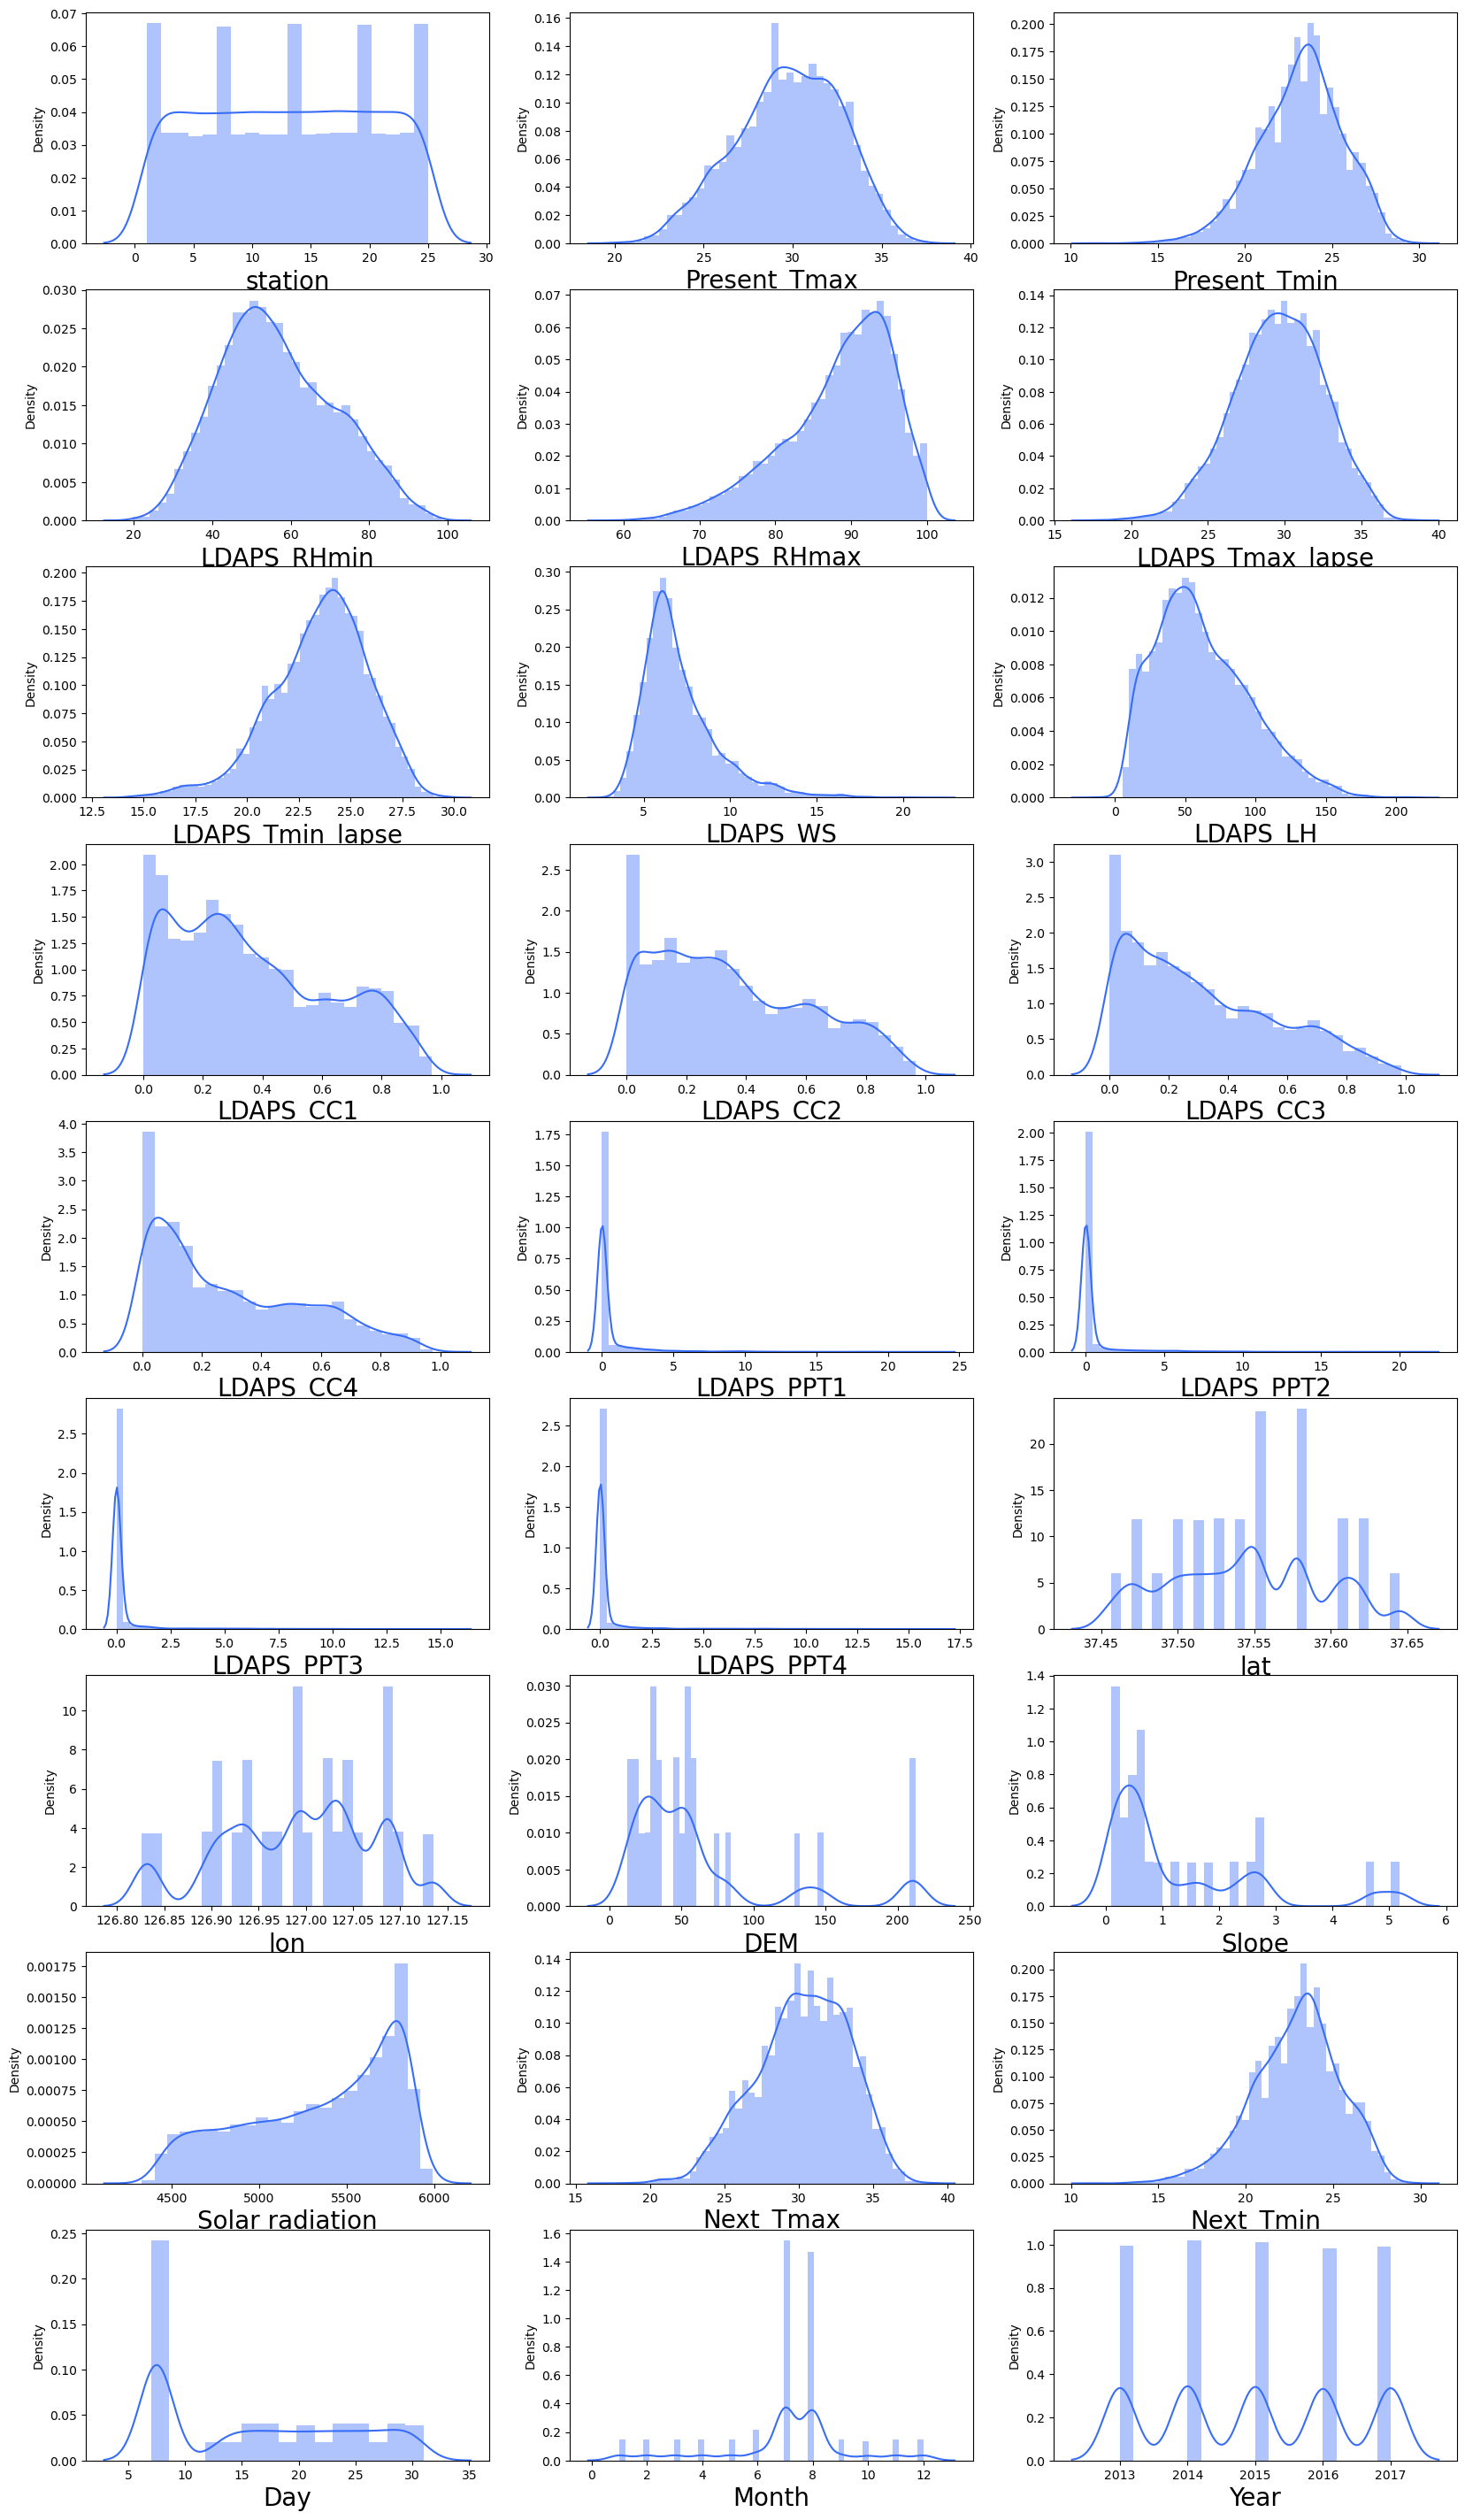

In [100]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [101]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

In [104]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [105]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax         0.002040
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse    0.002219
LDAPS_WS           -0.032077
LDAPS_LH           -0.053917
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.018560
LDAPS_CC4           0.032402
LDAPS_PPT1          1.054429
LDAPS_PPT2          1.190525
LDAPS_PPT3          1.256019
LDAPS_PPT4          1.490078
lat                 0.085377
lon                -0.289048
DEM                 0.009030
Slope               0.029592
Solar radiation    -0.044693
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month               0.070401
Year                0.013575
dtype: float64

In [107]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.177163     -0.335890     -0.039389     0.599093   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.110528      0.635837      0.768329     0.065391   
LDAPS_WS          0.016854     -0.098887     -0.002469     0.228219   
LDAPS_LH         -0.133444      0.121331     -0.015591    -0.038568   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3         0.000268     -0.132720      0.003862     0.668329   
LDAPS_CC4         0.006863     -0.125972     -0.031584     0.506737   
LDAPS_PPT1       -0.005646     -0.206591      0.083908     0.462759   
LDAPS_PPT2       -0.006629     -0.162212      0.076766     0.590461   
LDAPS_PPT3       -0.021969     -0.107780     -0.004525     0.487806   
LDAPS_PPT4       -0.006514     -0.103321     -0.092640     0.334347   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.320990     -0.150171     -0.251034     0.065312   
Slope            -0.144724     -0.106176     -0.172344     0.079369   
Solar radiation  -0.025473     -0.084140     -0.039842     0.219065   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Month             0.001383      0.011822     -0.006087    -0.046373   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.177163          0.069856          0.110528  0.016854   
Present_Tmax        -0.335890          0.573777          0.635837 -0.098887   
Present_Tmin        -0.039389          0.467904          0.768329 -0.002469   
LDAPS_RHmin          0.599093         -0.569580          0.065391  0.228219   
LDAPS_RHmax          1.000000         -0.405636         -0.179299  0.115917   
LDAPS_Tmax_lapse    -0.405636          1.000000          0.652770 -0.225664   
LDAPS_Tmin_lapse    -0.179299          0.652770          1.000000 -0.056776   
LDAPS_WS             0.115917         -0.225664         -0.056776  1.000000   
LDAPS_LH             0.240781          0.014542         -0.143939 -0.025629   
LDAPS_CC1            0.460219         -0.440878         -0.008175  0.237808   
LDAPS_CC2            0.409868         -0.525380          0.031791  0.198987   
LDAPS_CC3            0.200057         -0.502304         -0.022085  0.115034   
LDAPS_CC4            0.117269         -0.397383         -0.058370  0.129043   
LDAPS_PPT1           0.452265         -0.319379         -0.045113  0.245675   
LDAPS_PPT2           0.431887         -0.425739         -0.024067  0.242742   
LDAPS_PPT3           0.290465         -0.358437         -0.067934  0.147309   
LDAPS_PPT4           0.172808         -0.289246         -0.133663  0.212793   
lat                  0.240110         -0.044052         -0.099238  0.001683   
lon                  0.016044          0.091568         -0.025461 -0.070237   
DEM                  0.187984         -0.130306         -0.192743  0.135115   
Slope                0.212253         -0.113474         -0.170605  0.117344   
Solar radiation      0.159917         -0.026153          0.008975  0.175508   
Next_Tmax           -0.323610          0.835729          0.592567 -0.267752   
Next_Tmin           -0.098205          0.589963          0.880480 -0.037697   
Day                 -0.014467         -0.161320        

# Machine Learning Model Building For Next_Tmax

#       Standard Scaling

In [108]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [109]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity between features using variance_inflation_factor

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.276808           station
1     2.921843      Present_Tmax
2     3.506021      Present_Tmin
3     6.597677       LDAPS_RHmin
4     2.734587       LDAPS_RHmax
5     7.154726  LDAPS_Tmax_lapse
6     8.263775  LDAPS_Tmin_lapse
7     1.267848          LDAPS_WS
8     1.487876          LDAPS_LH
9     5.855821         LDAPS_CC1
10    6.286637         LDAPS_CC2
11    4.932372         LDAPS_CC3
12    3.079989         LDAPS_CC4
13    3.147447        LDAPS_PPT1
14    2.713442        LDAPS_PPT2
15    1.851623        LDAPS_PPT3
16    1.890363        LDAPS_PPT4
17    1.314097               lat
18    1.226042               lon
19    3.343048               DEM
20    2.857525             Slope
21    1.513931   Solar radiation
22    6.028747         Next_Tmin
23    1.284819               Day
24    1.126891             Month
25    1.109520              Year

In [145]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)

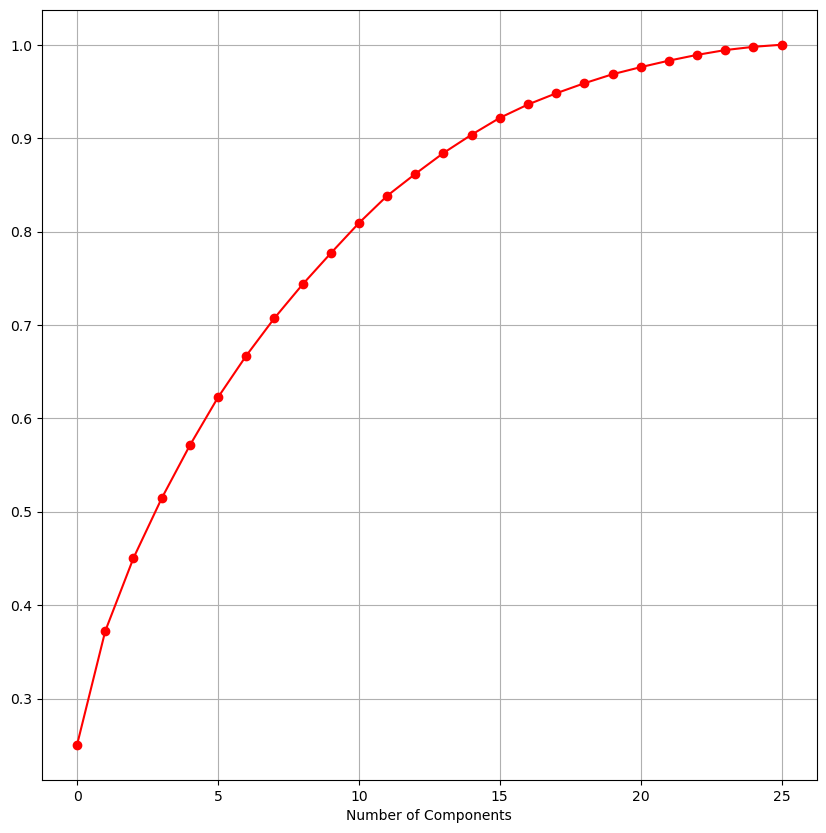

In [268]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.grid()

In [197]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5083, 15)
Training target vector size: (5083,)
Test feature matrix size: (2505, 15)
Test target vector size: (2505,)


In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8135629379210069 on Random_state 43


In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins',y_pred)
print('\n')
print('Actual Wins',Y_test)


Predicted Wins [27.17912314 26.28870123 28.37949464 ... 31.19820943 27.78501432
 32.00466071]


Actual Wins 2740    23.7
6137    26.1
6896    26.9
3865    31.6
2099    29.0
        ... 
6118    24.8
6348    34.5
3932    32.1
2104    25.6
3863    32.3
Name: Next_Tmax, Length: 2505, dtype: float64


In [218]:
#RANDOM TREE REGRESSOR
model =RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
y_pred = model.predict(X_test)                                      
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))



Mean absolute error : 0.70549620758483
Mean squared error : 0.8892063984031925
Root Mean Squared Error: 0.9429774113960485


EXTRA TREE REGRESSOER

In [217]:
model =ExtraTreesRegressor()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
y_pred = model.predict(X_test)
print('\n')                                        
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print(r2_score(Y_test,y_pred))



Mean absolute error : 0.5989968063872256
Mean squared error : 0.6314670502994011
Root Mean Squared Error: 0.7946490107584613
0.9369119079876743


HYPERPARAMETER TUNING USING GRIDSEARCH 

In [244]:
from sklearn.model_selection import GridSearchCV
parameter = {"n_estimators":[10,20,30],
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]}

In [245]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [246]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 1/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.882 total time=   0.6s
[CV 2/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 2/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.891 total time=   0.4s
[CV 3/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 3/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.888 total time=   0.6s
[CV 4/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 4/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.901 total time=   0.4s
[CV 5/5; 1/54] START bootstrap=True, max_features=auto, min_samples_sp

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=10)

In [247]:
GCV.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

FINAL MODEL

In [253]:
modFI =RandomForestRegressor(n_estimators=20,max_features="auto",)
modFI.fit(X_train,Y_train)
y_pred=modFI.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print(r2_score(Y_test,y_pred)) 
print('\n')

Mean absolute error : 0.5773313373253491
Mean squared error : 0.5759375149700597
Root Mean Squared Error: 0.7589054716959549
0.9063314735426117




In [266]:
import joblib
joblib.dump(modFI,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

Machine Learning Model Building For Next_Tmax


Standard Scaling

In [219]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [220]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5083, 26)
Training target vector size: (5083,)
Test feature matrix size: (2505, 26)
Test target vector size: (2505,)


In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8602310160767475 on Random_state 103


In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

In [226]:
print(y_pred)

[19.73780143 23.32895133 25.03858747 ... 24.20090288 25.13205549
 19.98372163]


In [228]:
print(Y_test)

5083    20.3
1512    23.5
4053    23.4
3813    24.2
3776    24.0
        ... 
7419    22.6
7141    23.4
3378    23.8
5832    26.4
3506    18.7
Name: Next_Tmin, Length: 2505, dtype: float64


In [230]:
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

Mean absolute error : 0.7465641338694081
Mean squared error : 0.8972278035778551
Root Mean Squared Error: 0.9472210954037369
0.8540779093681619


In [254]:
#RANDOM TREE REGRESSOR
model =RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
y_pred = model.predict(X_test)                                      
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))

Mean absolute error : 0.5627085828343311
Mean squared error : 0.544679529341317
Root Mean Squared Error: 0.7380240709769005


EXTRA TREE REGRESSOER

In [255]:
model =ExtraTreesRegressor()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
y_pred = model.predict(X_test)
print('\n')                                        
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print(r2_score(Y_test,y_pred))



Mean absolute error : 0.5200594810379242
Mean squared error : 0.469944571257485
Root Mean Squared Error: 0.6855250332828736
0.9235698068589505


HYPERPARAMETER TUNING FOR BETTER PERFORMANCE OF THE MODEL

In [258]:
from sklearn.model_selection import GridSearchCV
parameter = {"n_estimators":[10,20,30],
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]}

In [259]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [260]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 1/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.884 total time=   0.5s
[CV 2/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 2/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.892 total time=   0.5s
[CV 3/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 3/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.884 total time=   0.6s
[CV 4/5; 1/54] START bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10
[CV 4/5; 1/54] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.896 total time=   0.5s
[CV 5/5; 1/54] START bootstrap=True, max_features=auto, min_samples_sp

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=10)

In [262]:
GCV.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

FINAL MODEL 

In [263]:
modFI =RandomForestRegressor(n_estimators=20,max_features="auto",)
modFI.fit(X_train,Y_train)
y_pred=modFI.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print(r2_score(Y_test,y_pred)) 
print('\n')

Mean absolute error : 0.5787584830339321
Mean squared error : 0.5761241317365269
Root Mean Squared Error: 0.7590284129968567
0.9063011228238742




Final Regression Saving Model

In [264]:
import joblib
joblib.dump(modFI,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']